In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv("/home/IHME_GBD_2010_MORTALITY_AGE_SPECIFIC_BY_COUNTRY_1970_2010.csv")

df

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
0,AFG,Afghanistan,1970,0-6 days,Male,"19,241","318,292.90"
1,AFG,Afghanistan,1970,0-6 days,Female,"12,600","219,544.20"
2,AFG,Afghanistan,1970,0-6 days,Both,"31,840","270,200.70"
3,AFG,Afghanistan,1970,7-27 days,Male,"15,939","92,701.00"
4,AFG,Afghanistan,1970,7-27 days,Female,"11,287","68,594.50"
...,...,...,...,...,...,...,...
58900,ZWE,Zimbabwe,2010,80+ years,Female,"7,606","16,179.40"
58901,ZWE,Zimbabwe,2010,80+ years,Both,"13,305","16,633.80"
58902,ZWE,Zimbabwe,2010,All ages,Male,"82,010","1,320.10"
58903,ZWE,Zimbabwe,2010,All ages,Female,"77,420","1,211.20"


Primeiramente vou fazer uma análise geral do dataset, verificando número de missings, quantidade de países distintos disponíveis, quantidade de anos disponíveis e número de linhas.


In [7]:
#Verificando o numero de linhas e colunas do DF

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58905 entries, 0 to 58904
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country Code            58905 non-null  object
 1   Country Name            58905 non-null  object
 2   Year                    58905 non-null  int64 
 3   Age Group               58905 non-null  object
 4   Sex                     58905 non-null  object
 5   Number of Deaths        58905 non-null  object
 6   Death Rate Per 100,000  58905 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [8]:
#Verificando os valores ausentes

df.isnull().sum()


,0
Country Code,0
Country Name,0
Year,0
Age Group,0
Sex,0
Number of Deaths,0
"Death Rate Per 100,000",0


In [9]:
#Verificando alguns valores do DF

df.describe()

,Year
count,58905.000000
mean,1990.000000
std,14.142256
min,1970.000000
25%,1980.000000
50%,1990.000000
75%,2000.000000
max,2010.000000


In [10]:
#Verificando valores unicos do DF, assim conseguimos saber que temos 187 paises distindos e uma quantidade de 5 anos disponiveis para a nossa analise

df.nunique()

,0
Country Code,187
Country Name,187
Year,5
Age Group,21
Sex,3
Number of Deaths,16074
"Death Rate Per 100,000",32314


1. Qual país tem a maior média de taxa de mortalidade por 100.000 indivíduos ao longo de todos os anos?


In [11]:
df['Death Rate Per 100,000'] = pd.to_numeric(df['Death Rate Per 100,000'].str.replace(',', ''), errors='coerce')#Tive que converte a coluna para um tipo numérico

maior_taxa = df.groupby("Country Name")["Death Rate Per 100,000"].mean()

pais_maior_taxa = maior_taxa.idxmax()
maior_media = maior_taxa.max()

print(f"O país com a maior média de taxa de mortalidade é {pais_maior_taxa} com {maior_media:.2f} mortes por 100.000 indivíduos")

O país com a maior média de taxa de mortalidade é Mali com 16663.68 mortes por 100.000 indivíduos


2. Qual é a tendência na taxa de mortalidade por 100.000 indivíduos ao longo dos anos para os países da América do Sul? Trace um gráfico de linhas contendo todos os países e a evolução das mortes ao longo dos anos.


In [12]:
#Primeiro vejo quais países da America do sul estão no Data Set
print(df["Country Name"].unique())

['Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Armenia' 'Antigua and Barbuda' 'Australia' 'Austria'
 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bulgaria' 'Bahrain' 'Bahamas' 'Bosnia and Herzegovina' 'Belarus'
 'Belize' 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan'
 'Botswana' 'Central African Republic' 'Canada' 'Switzerland' 'Chile'
 'China' "Cote d'Ivoire" 'Cameroon'
 'Congo, the Democratic Republic of the' 'Congo' 'Colombia' 'Comoros'
 'Cape Verde' 'Costa Rica' 'Cuba' 'Cyprus' 'Czech Republic' 'Germany'
 'Djibouti' 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador'
 'Egypt' 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France'
 'Micronesia, Federated States of' 'Gabon' 'United Kingdom' 'Georgia'
 'Ghana' 'Guinea' 'Gambia' 'Guinea-Bissau' 'Equatorial Guinea' 'Greece'
 'Grenada' 'Guatemala' 'Guyana' 'Honduras' 'Croatia' 'Haiti' 'Hungary'
 'Indonesia' 'India' 'Ireland' 'Iran, Islamic Republi

In [13]:
#Agora vou criar uma lista apenas com países da America do Sul

paises_america_sul =[ 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador','Guyana','Paraguay', 'Peru','Uruguay','Venezuela','Suriname' ]

#Filtro o DF
df_america_sul = df[df['Country Name'].isin(paises_america_sul)]

df_america_sul

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
1575,ARG,Argentina,1970,0-6 days,Male,"6,425",121527.0
1576,ARG,Argentina,1970,0-6 days,Female,"4,739",92984.7
1577,ARG,Argentina,1970,0-6 days,Both,"11,164",107518.4
1578,ARG,Argentina,1970,7-27 days,Male,"2,458",15763.3
1579,ARG,Argentina,1970,7-27 days,Female,"1,842",12219.6
...,...,...,...,...,...,...,...
56695,VEN,Venezuela,2010,80+ years,Female,"16,105",9586.0
56696,VEN,Venezuela,2010,80+ years,Both,"30,639",10665.7
56697,VEN,Venezuela,2010,All ages,Male,"91,718",630.5
56698,VEN,Venezuela,2010,All ages,Female,"53,382",369.6


In [14]:
#Agora vou agrupar por ano e calcular a média.

media_america_sul = df_america_sul.groupby(['Year', "Country Name"])['Death Rate Per 100,000'].mean().reset_index()

media_america_sul.head()



,Year,Country Name,"Death Rate Per 100,000"
0,1970,Argentina,7667.509524
1,1970,Bolivia,12933.046032
2,1970,Brazil,10142.822222
3,1970,Chile,7458.658730
4,1970,Colombia,5477.998413


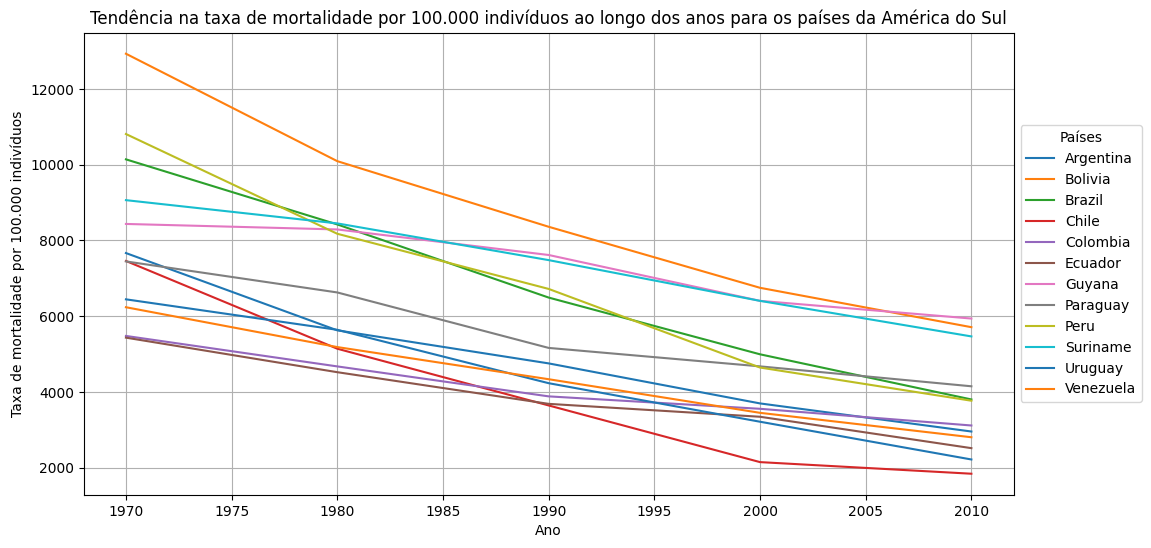

In [15]:
#Agora vou plotar o gáfico, criando uma linha para cada País

plt.figure(figsize=(12, 6))
for Paises in media_america_sul['Country Name'].unique():

  paises_data = media_america_sul[media_america_sul['Country Name'] == Paises]

  plt.plot(paises_data['Year'], paises_data['Death Rate Per 100,000'], label=Paises)

#Adicionando os títulos e labels
plt.title("Tendência na taxa de mortalidade por 100.000 indivíduos ao longo dos anos para os países da América do Sul")
plt.xlabel("Ano")
plt.ylabel("Taxa de mortalidade por 100.000 indivíduos")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Países')
plt.grid(True)

#Mostrando o gráfico
plt.show()


3. Existem diferenças significativas nas taxas de mortalidade entre homens e mulheres em diferentes grupos etários para os países da América do Sul?​


In [16]:
#Primeiro vou analisar se temos colunas separadas para homens e mulheres
print(df_america_sul)

      Country Code Country Name  Year  Age Group     Sex Number of Deaths  \
1575           ARG    Argentina  1970   0-6 days    Male            6,425   
1576           ARG    Argentina  1970   0-6 days  Female            4,739   
1577           ARG    Argentina  1970   0-6 days    Both           11,164   
1578           ARG    Argentina  1970  7-27 days    Male            2,458   
1579           ARG    Argentina  1970  7-27 days  Female            1,842   
...            ...          ...   ...        ...     ...              ...   
56695          VEN    Venezuela  2010  80+ years  Female           16,105   
56696          VEN    Venezuela  2010  80+ years    Both           30,639   
56697          VEN    Venezuela  2010   All ages    Male           91,718   
56698          VEN    Venezuela  2010   All ages  Female           53,382   
56699          VEN    Venezuela  2010   All ages    Both          145,101   

       Death Rate Per 100,000  
1575                 121527.0  
1576       

In [17]:
#Como analisado, apenas 1 coluna para ambos. Para responder a questão vou dividir os dados entre homens e mulheres criando 2 subconjuntos para filtrar os dados por sexo.

df_homens_sul = df_america_sul[df_america_sul["Sex"] == "Male"]
df_mulheres_sul = df_america_sul[df_america_sul["Sex"] == "Female"]

In [18]:
#Agora verificando os valores únicos em ambos os subconjuntos

print(df_homens_sul["Age Group"].unique())
print(df_mulheres_sul["Age Group"].unique())

['0-6 days' '7-27 days' '28-364 days' '1-4 years' '5-9 years'
 '10-14 years' '15-19 years' '20-24 years' '25-29 years' '30-34 years'
 '35-39 years' '40-44 years' '45-49 years' '50-54 years' '55-59 years'
 '60-64 years' '65-69 years' '70-74 years' '75-79 years' '80+ years'
 'All ages']
['0-6 days' '7-27 days' '28-364 days' '1-4 years' '5-9 years'
 '10-14 years' '15-19 years' '20-24 years' '25-29 years' '30-34 years'
 '35-39 years' '40-44 years' '45-49 years' '50-54 years' '55-59 years'
 '60-64 years' '65-69 years' '70-74 years' '75-79 years' '80+ years'
 'All ages']


In [19]:
#Agora, vou calcular a taxa de mortalidade por faixa etária

taxa_mortalidade_homens = df_homens_sul.groupby("Age Group")["Death Rate Per 100,000"].mean()
taxa_mortalidade_mulheres = df_mulheres_sul.groupby('Age Group')["Death Rate Per 100,000"].mean()

print(taxa_mortalidade_homens)
print(taxa_mortalidade_mulheres)

Age Group
0-6 days       84484.528333
1-4 years        408.318333
10-14 years       73.136667
15-19 years      150.161667
20-24 years      232.018333
25-29 years      263.641667
28-364 days     2622.563333
30-34 years      301.650000
35-39 years      373.955000
40-44 years      485.288333
45-49 years      673.813333
5-9 years         82.226667
50-54 years      981.581667
55-59 years     1416.050000
60-64 years     2139.963333
65-69 years     3143.395000
7-27 days      11910.958333
70-74 years     4763.913333
75-79 years     7095.165000
80+ years      13523.231667
All ages         789.871667
Name: Death Rate Per 100,000, dtype: float64
Age Group
0-6 days       63368.916667
1-4 years        352.851667
10-14 years       51.036667
15-19 years       82.855000
20-24 years      111.910000
25-29 years      137.933333
28-364 days     2151.415000
30-34 years      171.625000
35-39 years      237.583333
40-44 years      307.481667
45-49 years      421.720000
5-9 years         61.523333
50-54 years

In [20]:
#Agora com essas informações vou criar um data frame mais organizado!

df_mortalidade_por_sexo = pd.DataFrame({
    "Age Group": taxa_mortalidade_homens.index,#índices que representam os grupos etários
    "Taxa de mortalidade homens": taxa_mortalidade_homens.values,#valores das taxas de mortalidade masculina
    "Taxa de mortalidade mulheres": taxa_mortalidade_mulheres.values# valores das taxas de mortalidade feminina
})

#Ordenando os grupos etários corretamente para não ficar bagunçado no gráfico
df_mortalidade_por_sexo = df_mortalidade_por_sexo.set_index("Age Group").loc[
    [
        '0-6 days', '7-27 days', '28-364 days', '1-4 years', '5-9 years',
        '10-14 years', '15-19 years', '20-24 years', '25-29 years', '30-34 years',
        '35-39 years', '40-44 years', '45-49 years', '50-54 years', '55-59 years',
        '60-64 years', '65-69 years', '70-74 years', '75-79 years', '80+ years'
    ]
].reset_index()


print(df_mortalidade_por_sexo.head())


     Age Group  Taxa de mortalidade homens  Taxa de mortalidade mulheres
0     0-6 days                84484.528333                  63368.916667
1    7-27 days                11910.958333                   9542.816667
2  28-364 days                 2622.563333                   2151.415000
3    1-4 years                  408.318333                    352.851667
4    5-9 years                   82.226667                     61.523333


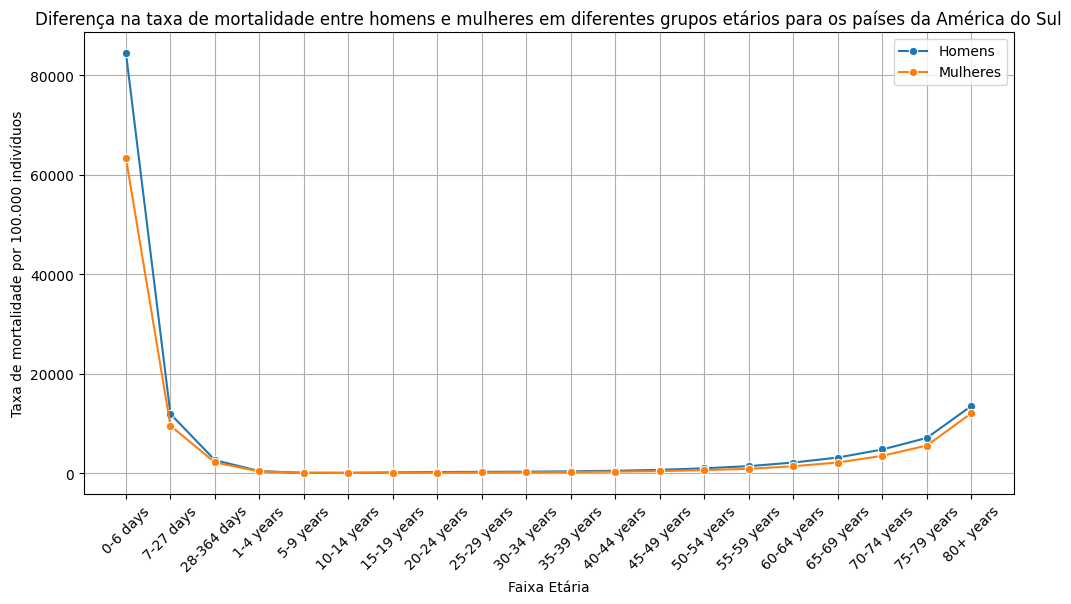

In [21]:
#Agora vou gerar um gráfico para visualizar a diferença

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_mortalidade_por_sexo, x="Age Group", y="Taxa de mortalidade homens", label="Homens", marker='o', linestyle='-')
sns.lineplot(data=df_mortalidade_por_sexo, x="Age Group", y="Taxa de mortalidade mulheres", label="Mulheres", marker='o', linestyle='-')

plt.xticks(rotation=45)
plt.xlabel("Faixa Etária")
plt.ylabel("Taxa de mortalidade por 100.000 indivíduos")
plt.title("Diferença na taxa de mortalidade entre homens e mulheres em diferentes grupos etários para os países da América do Sul")
plt.legend()
plt.grid(True)

plt.show()

4.Como a taxa de mortalidade por 100.000 indivíduos varia entre diferentes grupos etários dentro do Brasil? Utilize um histograma contendo a distribuição das mortes por ano para cada uma das faixas etárias

In [22]:
#Aqui comos vamos estudar apenas o Brasil, crio um filtro de dados so para ele.

morte_brasil = df[df["Country Name"] == 'Brazil']
print(morte_brasil)

     Country Code Country Name  Year  Age Group     Sex Number of Deaths  \
7245          BRA       Brazil  1970   0-6 days    Male           52,758   
7246          BRA       Brazil  1970   0-6 days  Female           36,142   
7247          BRA       Brazil  1970   0-6 days    Both           88,900   
7248          BRA       Brazil  1970  7-27 days    Male           28,889   
7249          BRA       Brazil  1970  7-27 days  Female           24,198   
...           ...          ...   ...        ...     ...              ...   
7555          BRA       Brazil  2010  80+ years  Female          189,311   
7556          BRA       Brazil  2010  80+ years    Both          341,104   
7557          BRA       Brazil  2010   All ages    Male          689,753   
7558          BRA       Brazil  2010   All ages  Female          520,089   
7559          BRA       Brazil  2010   All ages    Both        1,209,842   

      Death Rate Per 100,000  
7245                161760.0  
7246                11595

In [23]:
#Antes de dar inicio eu transformo a coluna Numero de mortes, para numérica.

morte_brasil['Number of Deaths'] = morte_brasil['Number of Deaths'].str.replace(',', '').astype(float)

print(morte_brasil.dtypes)

Country Code               object
Country Name               object
Year                        int64
Age Group                  object
Sex                        object
Number of Deaths          float64
Death Rate Per 100,000    float64
dtype: object


<ipython-input-23-a1e34c8b5863>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morte_brasil['Number of Deaths'] = morte_brasil['Number of Deaths'].str.replace(',', '').astype(float)


In [24]:
#Agora vou agrupar os dados por Ano e faixa etária

morte_brasil = morte_brasil[morte_brasil['Age Group'] != 'All Ages']#Removi todas as idades para focar em faixas etarias especificas.

grupo_etario_brasil = morte_brasil.groupby(['Year', 'Age Group'])["Death Rate Per 100,000"].mean().reset_index()

print(grupo_etario_brasil)

     Year    Age Group  Death Rate Per 100,000
0    1970     0-6 days           139030.133333
1    1970    1-4 years              585.566667
2    1970  10-14 years               77.866667
3    1970  15-19 years              135.433333
4    1970  20-24 years              205.300000
..    ...          ...                     ...
100  2010    7-27 days             4320.333333
101  2010  70-74 years             3279.600000
102  2010  75-79 years             5080.833333
103  2010    80+ years            11970.100000
104  2010     All ages              620.633333

[105 rows x 3 columns]


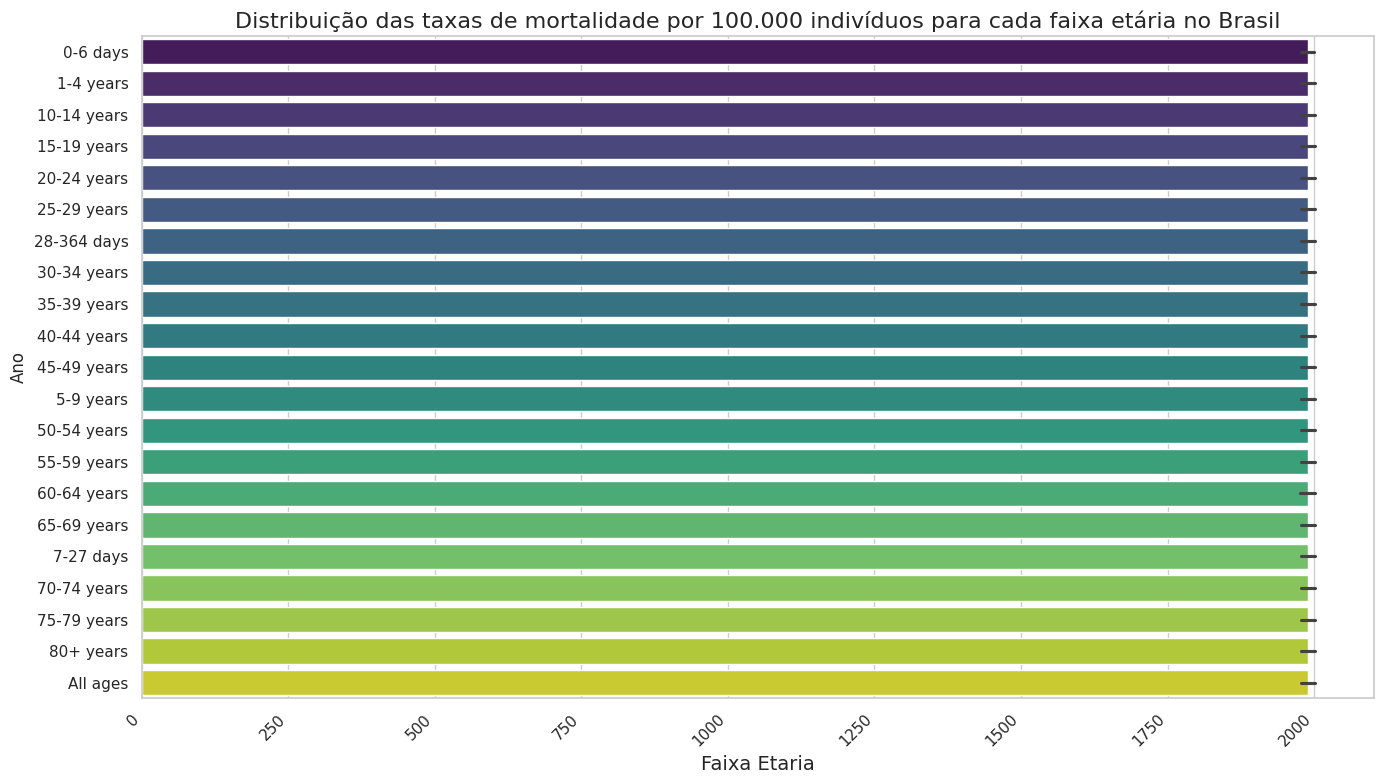

In [25]:
#Nesta etapa vou deixar mais claro a visualização da distribuição das taxas de mortalidadde por faixa etaria

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

sns.barplot(data=grupo_etario_brasil, x='Year', y="Age Group", hue='Age Group', palette='viridis', dodge=False)

plt.title("Distribuição das taxas de mortalidade por 100.000 indivíduos para cada faixa etária no Brasil", fontsize=16)
plt.xlabel("Faixa Etaria", fontsize=14)
plt.ylabel("Ano")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5. Qual a evolução das mortes por gênero pra o Brasil? Trace um gráfico de linhas com cada uma delas representando um dos gêneros ao longo dos anos.

<ipython-input-29-e3a4000c0619>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil['Number of Deaths'] = pd.to_numeric(df_brazil['Number of Deaths'].str.replace(',', ''), errors='coerce')


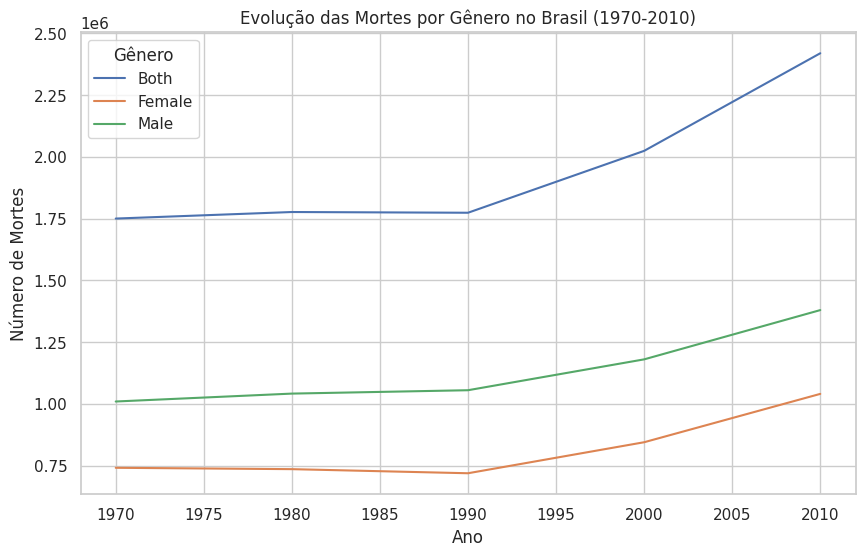

In [29]:
#Primeiro vou filtar os dados apenas para o Brasil

df_brazil = df[df['Country Name'] == 'Brazil']

#Converter 'Number of Deaths' para numerico.
df_brazil['Number of Deaths'] = pd.to_numeric(df_brazil['Number of Deaths'].str.replace(',', ''), errors='coerce')

#Agora vou agrupar por ano e gênero

df_brazil_gender = df_brazil.groupby(['Year', 'Sex'])['Number of Deaths'].sum().unstack()

#Agora vou plotar o gráfico com as informações

df_brazil_gender.plot(kind='line', figsize=(10, 6))
plt.title('Evolução das Mortes por Gênero no Brasil (1970-2010)')
plt.xlabel('Ano')
plt.ylabel('Número de Mortes')
plt.legend(title='Gênero')
plt.show()



6. Qual grupo etário tem o maior número de mortes no Brasil? Este número é o mesmo quando olhamos para todos os anos em comparação com quando consideramos apenas os últimos 10 anos?

In [32]:
#Vou agrupar por grupo etário para todos os anos
df_brazil_age_all = df_brazil.groupby('Age Group')['Number of Deaths'].sum().sort_values(ascending=False)

#Agora filtar para os últimos 10 anos (2000-2010)
df_brazil_last10 = df_brazil[df_brazil['Year'] >= 2000]
df_brazil_age_last10 = df_brazil_last10.groupby('Age Group')['Number of Deaths'].sum().sort_values(ascending=False)

print("Grupo etário com maior número de mortes (1970-2010):", df_brazil_age_all.idxmax)
print("Grupo etário com maior número de mortes (2000-2010):", df_brazil_age_last10.idxmax)

Grupo etário com maior número de mortes (1970-2010): <bound method Series.idxmax of Age Group
All ages       9744696
80+ years      1586518
28-364 days     985832
70-74 years     797112
75-79 years     774173
65-69 years     703498
60-64 years     631548
0-6 days        624452
55-59 years     539089
50-54 years     470164
45-49 years     396882
40-44 years     333993
1-4 years       319301
7-27 days       282812
35-39 years     280953
30-34 years     247891
25-29 years     230288
20-24 years     222577
15-19 years     165842
5-9 years        77319
10-14 years      74455
Name: Number of Deaths, dtype: int64>
Grupo etário com maior número de mortes (2000-2010): <bound method Series.idxmax of Age Group
All ages       4444034
80+ years      1097549
75-79 years     429464
70-74 years     427408
65-69 years     362165
60-64 years     324709
55-59 years     274918
50-54 years     236850
45-49 years     200551
40-44 years     159275
0-6 days        147858
35-39 years     131400
28-364 days    

7. Qual país apresentou a melhoria mais significativa nas taxas de mortalidade por 100.000 indivíduos ao longo do período analisado?

In [37]:
#Primeiro vou calcular a diferença nas taxas de mortalidade por país
df['Death Rate Per 100,000'] = df['Death Rate Per 100,000'].astype(str).str.replace(',', '').astype(float)
df_first_last = df.groupby(['Country Name', 'Year'])['Death Rate Per 100,000'].mean().unstack()
df_first_last['Improvement'] = df_first_last[1970] - df_first_last[2010]

#Agora encontrar o país com a maior melhoria
most_improved_country = df_first_last['Improvement'].idxmax()
most_improved_value = df_first_last['Improvement'].max()

print(f"País com a maior melhoria: {most_improved_country} com uma redução de {most_improved_value:.2f} mortes por 100.000 habitantes.")



País com a maior melhoria: Maldives com uma redução de 15301.04 mortes por 100.000 habitantes.


**Modelo básico de Machine Learning criado para,  

In [51]:
!pip install pandas scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Verificar o tipo da coluna 'Death Rate Per 100,000'
print(df['Death Rate Per 100,000'].dtype)



float64


In [52]:

if df['Death Rate Per 100,000'].dtype == 'object':
    df['Death Rate Per 100,000'] = df['Death Rate Per 100,000'].str.replace(',', '').astype(float)
else:

    df['Death Rate Per 100,000'] = df['Death Rate Per 100,000'].astype(float)


if df['Number of Deaths'].dtype == 'object':
    df['Number of Deaths'] = df['Number of Deaths'].str.replace(',', '').astype(float)
else:

    df['Number of Deaths'] = df['Number of Deaths'].astype(float)

#Selecionando as colunas relevantes
df = df[['Country Name', 'Year', 'Age Group', 'Sex', 'Number of Deaths', 'Death Rate Per 100,000']]

# Definir variáveis independentes (X) e dependente (y)
X = df[['Country Name', 'Year', 'Age Group', 'Sex']]
y = df['Number of Deaths']



<ipython-input-52-5755bceac57e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Death Rate Per 100,000'] = df['Death Rate Per 100,000'].astype(float)
<ipython-input-52-5755bceac57e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of Deaths'] = df['Number of Deaths'].str.replace(',', '').astype(float)


In [53]:
#Codificar variáveis categóricas

#Usando OneHotEncoder para transformar colunas categóricas
categorical_features = ['Country Name', 'Age Group', 'Sex']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

#Criar um ColumnTransformer para aplicar o OneHotEncoder apenas nas colunas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Manter outras colunas (neste caso, apenas 'Year')
)

In [54]:
#Criar um pipeline com pré-processamento e modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [55]:
#Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
#Treinar o modelo
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country Name', 'Age Group',
                                                   'Sex'])])),
                ('regressor', LinearRegression())])

In [58]:
#Fazer previsões
y_pred = model.predict(X_test)

In [68]:
#Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse}")

Erro Quadrático Médio (MSE): 17714368548.852146


In [69]:
#Visualizando alguns resultados
results = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(results.head(10))

           Real       Previsto
21095     783.0   10740.240036
33631    3878.0    1712.385745
29589     221.0   -8056.313434
34856      37.0   -3914.472546
49494    1696.0   -7550.573155
28452    1474.0   -5197.721771
28509    1423.0   -6589.393935
24414  150830.0  607969.454078
45005   21860.0  102780.364012
47108    2168.0    5915.255539
